# Pre-processing

## SetUp

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:

# 2nd Experiment
#df=pd.read_csv("../data/prepared/experiment2.csv")

# 3rd Experiment
df=pd.read_csv("../data/prepared/cleaned_df_with_car_ranges_consumption.csv")
data=df.copy()

In [3]:
data=data.sample(frac=1)

In [4]:
#data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23350 entries, 23005 to 10035
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           23350 non-null  int64  
 1   manufacturer                         23350 non-null  object 
 2   model                                23350 non-null  object 
 3   year                                 23350 non-null  int64  
 4   version                              23350 non-null  object 
 5   power(kW)                            23350 non-null  float64
 6   fuel_date                            23350 non-null  object 
 7   odometer                             15070 non-null  float64
 8   trip_distance(km)                    23350 non-null  float64
 9   quantity(kWh)                        23350 non-null  float64
 10  fuel_type                            23350 non-null  object 
 11  tire_type                    

In [5]:
data.shape

(23350, 25)

In [6]:
data.head()

,Unnamed: 0,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),...,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,man_model_year_verion,actual quantity consumed per 100 km
23005,30889,Tesla Motors,Model S,2015,Model S85,278.0,31.01.2020,111392.0,62.0,26.00,...,Normal,22.47,0,0,NaN,6.37,NaN,Tesla_Model_S_2015,TeslaMotors ModelS 2015 Model S85,41.935484
3713,3332,Hyundai,IONIQ,2018,Roadrunner,88.0,29.07.2019,NaN,85.8,11.44,...,Normal,13.33,0,0,NaN,NaN,NaN,Tesla_Model_S_2015,Hyundai IONIQ 2018 Roadrunner,13.333333
16574,23144,Hyundai,IONIQ,2017,Premium,88.0,23.02.2019,26301.0,111.0,14.08,...,Moderate,12.68,0,0,NaN,NaN,NaN,Tesla_Model_S_2015,Hyundai IONIQ 2017 Premium,12.684685
10871,7496,Mitsubishi,i-MiEV,2011,i-MiEV,49.0,25.08.2018,165086.0,39.8,4.67,...,Normal,11.73,0,0,NaN,-1.77,"Noch 10 Balken, 65km Reichweite, Mainova Ökost...",Tesla_Model_S_2015,Mitsubishi iMiEV 2011 i-MiEV,11.733668
15125,18851,Nissan,Leaf,2013,Leaf ZE0,80.0,16.07.2020,NaN,0.7,0.10,...,Normal,16.10,0,0,NaN,1.10,NaN,Tesla_Model_S_2015,Nissan Leaf 2013 Leaf ZE0,14.285714


In [7]:
data.tail()

,Unnamed: 0,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),...,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,man_model_year_verion,actual quantity consumed per 100 km
8121,6340,Nissan,Leaf,2017,Black Edition,80.0,04.05.2022,74823.0,77.0,9.35,...,Moderate,17.87,0,0,NaN,2.87,NaN,Tesla_Model_S_2015,Nissan Leaf 2017 Black Edition,12.142857
21612,29849,Mercedes-Benz,B-Klasse,2015,B250e,132.0,26.07.2019,66941.0,54.0,6.61,...,Normal,18.03,1,0,NaN,1.43,NaN,Tesla_Model_S_2015,MercedesBenz BKlasse 2015 B250e,12.240741
10144,8445,Mitsubishi,i-MiEV,2011,i-MiEV,49.0,07.09.2016,116067.0,76.6,7.31,...,Fast,11.44,0,0,NaN,-2.06,"Noch 3 Balken, 17km Reichweite, 24,0%, Batteri...",Tesla_Model_S_2015,Mitsubishi iMiEV 2011 i-MiEV,9.543081
14971,18709,Mitsubishi,i-MiEV,2014,i-MiEV,49.0,05.10.2019,4517.0,21.7,6.68,...,Normal,13.00,0,0,NaN,0.50,"Noch 10 Balken, 68km Reichweite, Mainova Ökost...",Tesla_Model_S_2015,Mitsubishi iMiEV 2014 i-MiEV,30.783410
10035,13640,Mitsubishi,i-MiEV,2011,i-MiEV,49.0,11.04.2014,60325.0,99.4,11.73,...,Normal,11.41,0,0,NaN,-2.09,"Noch 4 Balken, 36km Reichweite, 5,25h geladen,...",Tesla_Model_S_2015,Mitsubishi iMiEV 2011 i-MiEV,11.800805


In [8]:
distance_cal= data.copy()

In [9]:
data[['power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23350 entries, 23005 to 10035
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               23350 non-null  float64
 1   fuel_date               23350 non-null  object 
 2   odometer                15070 non-null  float64
 3   trip_distance(km)       23350 non-null  float64
 4   quantity(kWh)           23350 non-null  float64
 5   fuel_type               23350 non-null  object 
 6   tire_type               23260 non-null  object 
 7   city                    23350 non-null  int64  
 8   motor_way               23350 non-null  int64  
 9   country_roads           23350 non-null  int64  
 10  driving_style           23239 non-null  object 
 11  consumption(kWh/100km)  23255 non-null  float64
 12  A/C                     23350 non-null  int64  
 13  park_heating            23350 non-null  int64  
 14  avg_speed(km/h)         4137 non-null  

In [10]:
data.columns

Index(['Unnamed: 0', 'manufacturer', 'model', 'year', 'version', 'power(kW)',
       'fuel_date', 'odometer', 'trip_distance(km)', 'quantity(kWh)',
       'fuel_type', 'tire_type', 'city', 'motor_way', 'country_roads',
       'driving_style', 'consumption(kWh/100km)', 'A/C', 'park_heating',
       'avg_speed(km/h)', 'ecr_deviation', 'fuel_note', 'user_id',
       'man_model_year_verion', 'actual quantity consumed per 100 km'],
      dtype='object')

In [11]:
# distance_cal['calculated_distance']=(np.array(distance_cal['quantity(kWh)'])/np.array(distance_cal['consumption(kWh/100km)']))*100

In [12]:
data['tire_type'].unique()

array(['Winter tires', 'All-year tires', 'Summer tires', nan],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           23350 non-null  int64  
 1   manufacturer                         23350 non-null  object 
 2   model                                23350 non-null  object 
 3   year                                 23350 non-null  int64  
 4   version                              23350 non-null  object 
 5   power(kW)                            23350 non-null  float64
 6   fuel_date                            23350 non-null  object 
 7   odometer                             15070 non-null  float64
 8   trip_distance(km)                    23350 non-null  float64
 9   quantity(kWh)                        23350 non-null  float64
 10  fuel_type                            23350 non-null  object 
 11  tire_type                   

In [14]:
df=df.loc[df['trip_distance(km)']<=420.0,:]

In [15]:
df.shape

(23311, 25)

## Data Encoding

In [16]:
def convert_encodecategorical(data_sel):
     data_sel=data_sel.loc[(data_sel['driving_style']!='driving_style') & (data_sel['tire_type']!='tire_type'), :]
     data_sel.loc[:,'tire_type']=data_sel['tire_type'].map({'All-year tires':1,'Summer tires':3,'Winter tires':2, 'tire_type':0})
     data_sel.loc[:,'driving_style']=data_sel['driving_style'].map({'Fast':3,'Moderate':2,'Normal':1})
     
     return data_sel

def convert_to_numeric(columns,df):
    for col in columns:
        if col!='fuel_date':
           df.loc[:, col]=pd.to_numeric(df.loc[:,col], errors='coerce')
    return df

In [17]:

def convert_date(data_sel_num):
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].astype('str')
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].apply(lambda x :x.replace(".",'-'))
    data_sel_num['fuel_date_new']=pd.to_datetime(data_sel_num['fuel_date'], errors='coerce', format='%d-%m-%Y')
    # extracting month , day and day of the week from fuel_date
    data_sel_num['month']=data_sel_num['fuel_date_new'].dt.month
    data_sel_num['weekday']=data_sel_num['fuel_date_new'].dt.weekday
    data_sel_num['day']=data_sel_num['fuel_date_new'].dt.day
    data_sel_num.drop(columns=['fuel_date','fuel_date_new'], axis=1, inplace=True)
    return data_sel_num

### Mistubushi i-MiEV 2013 -MiEV 

In [18]:
# df=df[df['man_model_year_verion']=='Mitsubishi iMiEV 2011 i-MiEV']

## Preprocessing_Models

In [19]:
df.shape

(23311, 25)

In [20]:
y=pd.DataFrame(df['trip_distance(km)'])
X=df.drop(columns=['trip_distance(km)'], axis=1)

In [21]:
X.columns

Index(['Unnamed: 0', 'manufacturer', 'model', 'year', 'version', 'power(kW)',
       'fuel_date', 'odometer', 'quantity(kWh)', 'fuel_type', 'tire_type',
       'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id', 'man_model_year_verion',
       'actual quantity consumed per 100 km'],
      dtype='object')

In [22]:
df.head()

,Unnamed: 0,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),...,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,man_model_year_verion,actual quantity consumed per 100 km
0,543,Volkswagen,Golf,2018,e-Golf,100.0,24.11.2021,NaN,73.0,23.0,...,Normal,15.57,1,0,NaN,2.67,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,31.506849
1,608,Volkswagen,Golf,2018,e-Golf,100.0,05.10.2021,NaN,88.0,4.0,...,Normal,16.87,1,0,NaN,3.97,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,4.545455
2,235,Volkswagen,Golf,2018,e-Golf,100.0,03.08.2022,NaN,173.0,19.0,...,Normal,NaN,1,0,NaN,NaN,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,10.982659
3,274,Volkswagen,Golf,2018,e-Golf,100.0,23.06.2022,NaN,110.0,9.0,...,Normal,11.63,1,0,NaN,-1.27,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,8.181818
4,1047,Volkswagen,Golf,2018,e-Golf,100.0,07.07.2020,NaN,81.0,11.6,...,Normal,16.25,1,0,NaN,3.35,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,14.320988


In [23]:
y=pd.DataFrame(df['trip_distance(km)'])
X=df.drop(columns='trip_distance(km)', axis=1)
X_train_model, X_test_model, y_train_model, y_test_model=train_test_split(X, y, test_size=0.4, shuffle=True)
train_data=pd.concat([X_train_model,y_train_model], axis=1)
test_data=pd.concat([X_test_model,y_test_model], axis=1)

# Feature selction for volkswagen
# fetures_sel1=[ 'power(kW)', 'fuel_date', 'quantity(kWh)', 
#        'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
#         'park_heating', 'avg_speed(km/h)',
#        'ecr_deviation','consumption(kWh/100km)','trip_distance(km)']

#feature selection for all cars
fetures_sel1=[ 'power(kW)','fuel_date', 'quantity(kWh)', 'odometer',
               'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
               'consumption(kWh/100km)',  'A/C', 'park_heating',
                  'ecr_deviation','trip_distance(km)', 'user_id']

In [24]:
X_train_model.shape

(13986, 24)

In [25]:
X_test_model.shape

(9325, 24)

In [26]:
train_data=pd.concat([X_train_model,y_train_model], axis=1)
test_data=pd.concat([X_test_model,y_test_model], axis=1)

In [27]:
train_data.isna().sum()/train_data.shape[0]

Unnamed: 0                             0.000000
manufacturer                           0.000000
model                                  0.000000
year                                   0.000000
version                                0.000000
power(kW)                              0.000000
fuel_date                              0.000000
odometer                               0.360718
quantity(kWh)                          0.000000
fuel_type                              0.000000
tire_type                              0.004433
city                                   0.000000
motor_way                              0.000000
country_roads                          0.000000
driving_style                          0.004576
consumption(kWh/100km)                 0.004219
A/C                                    0.000000
park_heating                           0.000000
avg_speed(km/h)                        0.823681
ecr_deviation                          0.112398
fuel_note                              0

In [28]:
test_data.isna().sum()/test_data.shape[0]

Unnamed: 0                             0.000000
manufacturer                           0.000000
model                                  0.000000
year                                   0.000000
version                                0.000000
power(kW)                              0.000000
fuel_date                              0.000000
odometer                               0.346595
quantity(kWh)                          0.000000
fuel_type                              0.000000
tire_type                              0.003003
city                                   0.000000
motor_way                              0.000000
country_roads                          0.000000
driving_style                          0.005040
consumption(kWh/100km)                 0.003861
A/C                                    0.000000
park_heating                           0.000000
avg_speed(km/h)                        0.821984
ecr_deviation                          0.110027
fuel_note                              0

### 1. Feature Selection

In [29]:
train_model_sel=train_data[fetures_sel1]
test_model_sel=test_data[fetures_sel1]

In [30]:
train_model_sel.head()

,power(kW),fuel_date,quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),user_id
9926,49.0,18.07.2018,8.08,162628.0,Summer tires,1,1,1,Normal,11.60,0,0,-1.90,44.7,Tesla_Model_S_2015
21505,132.0,17.11.2017,13.05,27854.0,Summer tires,1,1,1,Moderate,21.79,0,1,5.19,70.0,Tesla_Model_S_2015
16831,88.0,21.05.2018,14.71,11250.0,Summer tires,1,1,1,Moderate,12.19,0,0,NaN,120.7,Tesla_Model_S_2015
10327,49.0,10.08.2017,4.18,140219.0,Summer tires,0,0,1,Moderate,11.27,0,0,-2.23,37.1,Tesla_Model_S_2015
9552,49.0,28.09.2016,10.70,118787.0,Summer tires,1,0,1,Normal,10.72,0,0,-2.78,99.8,Tesla_Model_S_2015


In [31]:
def fillinMissingvalues(df, columns):
    for col in columns:
        print(df[col].dtypes)
        if df[col].dtypes=='float64':
            df[col].fillna(value=df[col].mean(), inplace=True)
        elif df[col].dtypes=='object':
            df[col].fillna(value=df[col].astype('str').mode(), inplace=True)
        elif df[col].dtypes=='int64':
            df[col].fillna(value=df[col].mode(), inplace=True)
    return df
            

### Fill Missing value

In [32]:
train_model_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13986 entries, 9926 to 10416
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                8941 non-null   float64
 4   tire_type               13924 non-null  object 
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13922 non-null  object 
 9   consumption(kWh/100km)  13927 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           12414 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
 14  user_id                 13986 non-null  

In [33]:
test_model_sel.isna().any()

power(kW)                 False
fuel_date                 False
quantity(kWh)             False
odometer                   True
tire_type                  True
city                      False
motor_way                 False
country_roads             False
driving_style              True
consumption(kWh/100km)     True
A/C                       False
park_heating              False
ecr_deviation              True
trip_distance(km)         False
user_id                   False
dtype: bool

In [34]:
train_model_sel.columns

Index(['power(kW)', 'fuel_date', 'quantity(kWh)', 'odometer', 'tire_type',
       'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'ecr_deviation',
       'trip_distance(km)', 'user_id'],
      dtype='object')

In [35]:
columns=['consumption(kWh/100km)','ecr_deviation', 'tire_type', ] 
train_data=fillinMissingvalues(train_model_sel, columns)               
test_data=fillinMissingvalues(test_model_sel, columns)

float64
float64
object
float64
float64
object


/tmp/ipykernel_385920/1501830933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].mean(), inplace=True)
/tmp/ipykernel_385920/1501830933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].astype('str').mode(), inplace=True)
/tmp/ipykernel_385920/1501830933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(value=df[col].mean(), inplace=True)
/tmp/ipykernel_38

In [36]:
train_data.isna().sum()


power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  5045
tire_type                   62
city                         0
motor_way                    0
country_roads                0
driving_style               64
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
dtype: int64

In [37]:
test_data.isna().sum()

power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  3232
tire_type                   28
city                         0
motor_way                    0
country_roads                0
driving_style               47
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
dtype: int64

In [38]:
train_data['tire_type'].fillna(value=train_data['tire_type'].mode(), inplace=True)
test_data['tire_type'].fillna(value=test_data['tire_type'].mode(), inplace=True)

In [39]:
train_data['driving_style'].fillna(value=train_data['driving_style'].mode(), inplace=True)
test_data['driving_style'].fillna(value=test_data['driving_style'].mode(), inplace=True)

In [40]:
train_data.isna().sum()


power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  5045
tire_type                   62
city                         0
motor_way                    0
country_roads                0
driving_style               64
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
dtype: int64

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9325 entries, 14512 to 18136
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6093 non-null   float64
 4   tire_type               9297 non-null   object 
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9278 non-null   object 
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
 14  user_id                 9325 non-null   

### 2. Data type Conversion

In [42]:
#colums_for_num_cov=['power(kW)','quantity(kWh)','avg_speed(km/h)','ecr_deviation']

colums_for_num_cov=['power(kW)','quantity(kWh)','ecr_deviation', 'trip_distance(km)']
train_model_num=convert_to_numeric(colums_for_num_cov, train_model_sel)
test_model_num=convert_to_numeric(colums_for_num_cov, test_model_sel)

In [43]:
print(train_model_num.shape)
print(test_model_num.shape)

(13986, 15)
(9325, 15)


In [44]:
# train_model_cat=convert_encodecategorical(train_model_num)
# test_model_cat=convert_encodecategorical(test_model_num)

train_model_cat=convert_encodecategorical(train_data)
test_model_cat=convert_encodecategorical(test_data)

In [45]:
print(train_model_num.shape)
print(test_model_num.shape)

(13986, 15)
(9325, 15)


In [46]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13986 entries, 9926 to 10416
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                8941 non-null   float64
 4   tire_type               13924 non-null  object 
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13922 non-null  object 
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
 14  user_id                 13986 non-null  

In [47]:
test_model_cat.head()

,power(kW),fuel_date,quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),user_id
14512,49.0,06.06.2022,5.40,64656.0,3.0,0,1,1,3.0,14.37,0,0,1.87,65.1,Tesla_Model_S_2015
12563,85.0,01.09.2017,3.70,NaN,3.0,1,1,1,2.0,18.60,0,0,5.90,20.0,Tesla_Model_S_2015
10086,49.0,29.12.2011,8.38,12148.0,2.0,1,0,1,1.0,15.58,0,0,2.08,53.8,Tesla_Model_S_2015
4624,60.0,10.02.2018,12.00,NaN,2.0,1,1,0,1.0,16.92,1,0,2.62,46.0,Tesla_Model_S_2015
6553,85.0,29.08.2019,3.33,109185.0,3.0,0,0,1,2.0,12.80,1,0,0.10,26.0,Tesla_Model_S_2015


In [48]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13986 entries, 9926 to 10416
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                8941 non-null   float64
 4   tire_type               13924 non-null  object 
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13922 non-null  object 
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
 14  user_id                 13986 non-null  

In [49]:
test_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9325 entries, 14512 to 18136
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6093 non-null   float64
 4   tire_type               9297 non-null   object 
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9278 non-null   object 
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
 14  user_id                 9325 non-null   

### 3. Tranform Fuel Date

In [50]:
train_converted=convert_date(train_model_cat.copy())
test_converted=convert_date(test_model_cat.copy())

In [51]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 17)
(9325, 17)


In [52]:
test_converted.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),user_id,month,weekday,day
14512,49.0,5.40,64656.0,3.0,0,1,1,3.0,14.37,0,0,1.87,65.1,Tesla_Model_S_2015,6,0,6
12563,85.0,3.70,NaN,3.0,1,1,1,2.0,18.60,0,0,5.90,20.0,Tesla_Model_S_2015,9,4,1
10086,49.0,8.38,12148.0,2.0,1,0,1,1.0,15.58,0,0,2.08,53.8,Tesla_Model_S_2015,12,3,29
4624,60.0,12.00,NaN,2.0,1,1,0,1.0,16.92,1,0,2.62,46.0,Tesla_Model_S_2015,2,5,10
6553,85.0,3.33,109185.0,3.0,0,0,1,2.0,12.80,1,0,0.10,26.0,Tesla_Model_S_2015,8,3,29


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data=pd.concat([train_converted,test_converted], axis=0)

In [55]:
data.columns

Index(['power(kW)', 'quantity(kWh)', 'odometer', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'ecr_deviation', 'trip_distance(km)', 'user_id',
       'month', 'weekday', 'day'],
      dtype='object')

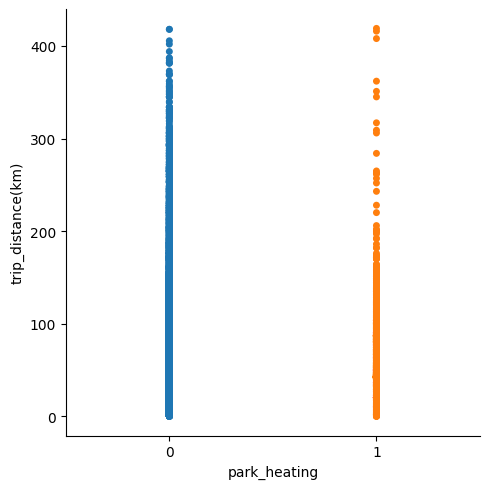

In [56]:
sns.catplot(data=data, x="park_heating", y="trip_distance(km)", jitter=False,hue='park_heating')

 ### 5. Filling Missing values

In [57]:
train_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13986 entries, 9926 to 10416
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   quantity(kWh)           13986 non-null  float64
 2   odometer                8941 non-null   float64
 3   tire_type               13924 non-null  object 
 4   city                    13986 non-null  int64  
 5   motor_way               13986 non-null  int64  
 6   country_roads           13986 non-null  int64  
 7   driving_style           13922 non-null  object 
 8   consumption(kWh/100km)  13986 non-null  float64
 9   A/C                     13986 non-null  int64  
 10  park_heating            13986 non-null  int64  
 11  ecr_deviation           13986 non-null  float64
 12  trip_distance(km)       13986 non-null  float64
 13  user_id                 13986 non-null  object 
 14  month                   13986 non-null  

In [58]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  5045
tire_type                   62
city                         0
motor_way                    0
country_roads                0
driving_style               64
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [59]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3232
tire_type                   28
city                         0
motor_way                    0
country_roads                0
driving_style               47
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [60]:
columns=['trip_distance(km)'] 
train_converted=fillinMissingvalues(train_converted, columns)               
test_converted=fillinMissingvalues(test_converted, columns)

float64
float64


In [61]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 17)
(9325, 17)


In [62]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  5045
tire_type                   62
city                         0
motor_way                    0
country_roads                0
driving_style               64
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [63]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3232
tire_type                   28
city                         0
motor_way                    0
country_roads                0
driving_style               47
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [64]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 17)
(9325, 17)


In [65]:
test_converted['tire_type'].fillna(value=test_converted['tire_type'].mode(), inplace=True)
test_converted['driving_style'].fillna(value=test_converted['driving_style'].mode(), inplace=True)



In [66]:
train_converted['tire_type'].fillna(value=train_converted['tire_type'].mode(), inplace=True)
train_converted['driving_style'].fillna(value=train_converted['driving_style'].mode(), inplace=True)


In [67]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  5045
tire_type                   62
city                         0
motor_way                    0
country_roads                0
driving_style               64
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [68]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3232
tire_type                   28
city                         0
motor_way                    0
country_roads                0
driving_style               47
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
user_id                      0
month                        0
weekday                      0
day                          0
dtype: int64

In [69]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13986 entries, 9926 to 10416
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                8941 non-null   float64
 4   tire_type               13924 non-null  object 
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13922 non-null  object 
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
 14  user_id                 13986 non-null  

In [70]:
test_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9325 entries, 14512 to 18136
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6093 non-null   float64
 4   tire_type               9297 non-null   object 
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9278 non-null   object 
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
 14  user_id                 9325 non-null   

In [71]:
train_converted.dropna(inplace=True)
test_converted.dropna(inplace=True)

In [72]:
print(train_converted.shape)
print(test_converted.shape)

(8833, 17)
(6031, 17)


In [73]:
train_converted_copy=train_converted.copy()

In [74]:
test_converted_copy=test_converted.copy()

In [75]:
train_converted_copy.drop(columns='odometer',axis=1)
test_converted_copy.drop(columns='odometer',axis=1)

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),user_id,month,weekday,day
14512,49.0,5.40,3.0,0,1,1,3.0,14.37,0,0,1.87,65.1,Tesla_Model_S_2015,6,0,6
10086,49.0,8.38,2.0,1,0,1,1.0,15.58,0,0,2.08,53.8,Tesla_Model_S_2015,12,3,29
6553,85.0,3.33,3.0,0,0,1,2.0,12.80,1,0,0.10,26.0,Tesla_Model_S_2015,8,3,29
10529,49.0,4.75,3.0,1,1,1,1.0,11.88,0,0,-1.62,32.7,Tesla_Model_S_2015,7,5,22
2406,278.0,16.00,3.0,1,0,1,1.0,20.21,0,0,4.11,127.0,Tesla_Model_S_2015,10,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21063,132.0,4.70,3.0,1,0,0,1.0,20.14,0,1,3.54,2.0,Tesla_Model_S_2015,11,3,11
14480,49.0,5.82,3.0,1,0,1,1.0,11.50,0,0,-1.00,50.6,Tesla_Model_S_2015,6,1,30
18033,35.0,6.20,3.0,1,1,1,1.0,14.76,0,0,2.26,42.0,Tesla_Model_S_2015,6,2,12
22974,278.0,32.00,3.0,0,1,0,1.0,21.65,0,0,5.55,127.0,Tesla_Model_S_2015,10,6,7


In [76]:
train_converted_copy.dropna(axis=0,inplace=True)


In [77]:
test_converted_copy.dropna(axis=0, inplace=True)

In [78]:
train_converted.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
user_id                   0
month                     0
weekday                   0
day                       0
dtype: int64

In [79]:
test_converted.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
user_id                   0
month                     0
weekday                   0
day                       0
dtype: int64

In [80]:

train_converted.shape

(8833, 17)

In [81]:
test_converted.shape

(6031, 17)

In [82]:
test_converted_copy.shape

(6031, 17)

In [83]:
train_converted_copy.shape

(8833, 17)

# Write to test and train

In [84]:
# Experiment 1
# train_converted.to_csv('../data/preprocessed/train_converted.csv')
# test_converted.to_csv('../data/preprocessed/test_converted.csv')

# Experiment 2
# train_converted.to_csv('../data/preprocessed/train_converted_experiment2.csv')
# test_converted.to_csv('../data/preprocessed/test_converted_experiment2.csv')


#Experiment 3
# train_converted.to_csv('../data/preprocessed/df_range_consumption_train_data.csv')
# test_converted.to_csv('../data/preprocessed/df_range_consumption_test_data.csv')




In [85]:
#Experiment 5
# train_converted.to_csv('../data/preprocessed/mistubushi_train.csv')
# test_converted.to_csv('../data/preprocessed/mistubushi_test.csv')

In [86]:
# # Experiment 3

train_converted.to_csv('../data/preprocessed/df_range_consumption_train_data_042023.csv')
test_converted.to_csv('../data/preprocessed/df_range_consumption_test_data_042023.csv')

In [87]:
# hug_test_clip.to_csv('../data/preprocessed/huggingface_test.csv')
# hug_train_clip.to_csv('../data/preprocessed/huggingface_train.csv')